In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Ridge, LinearRegression, ElasticNet, Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [119]:
# importing the dataset and reading it into dataframe, dropping out the date, and classes for they are irrelevant for this prediction

file_path = '/content/Algerian_forest_fires_cleaned.csv'

df = pd.read_csv(file_path)
df.drop(columns=['day', 'month', 'year', 'Classes'], inplace=True)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [120]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [121]:
# Checking for null values
null_values = df.isna()
null_count = null_values.sum()
print("\nTotal number of missing values:\n", null_count)


Total number of missing values:
 Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Region         0
dtype: int64


In [122]:
# Creating a function for detetcting outliers by using formula
def detect_outliers(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound =  Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = column[(column < lower_bound) | (column > upper_bound)]
  return outliers

"""
for column in df.select_dtypes(include=['number']).columns:
  outliers = detect_outliers(df[column])
  print("Outliers in column '{}':".format(column))
  print(outliers)
"""

'\nfor column in df.select_dtypes(include=[\'number\']).columns:\n  outliers = detect_outliers(df[column])\n  print("Outliers in column \'{}\':".format(column))\n  print(outliers)\n'

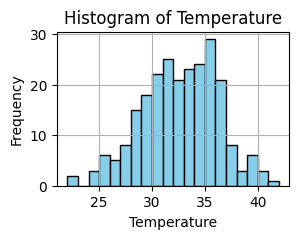

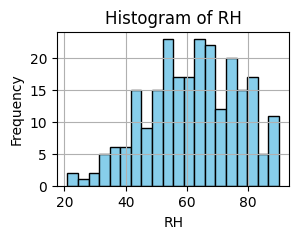

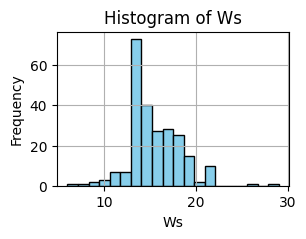

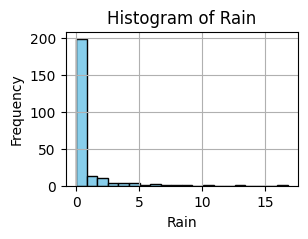

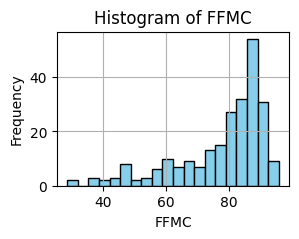

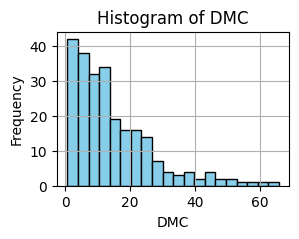

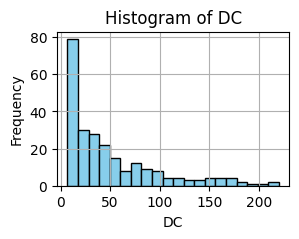

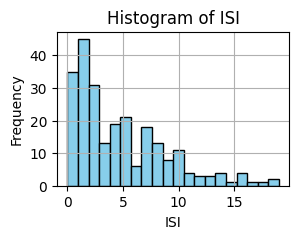

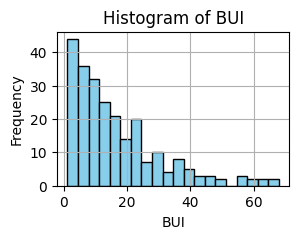

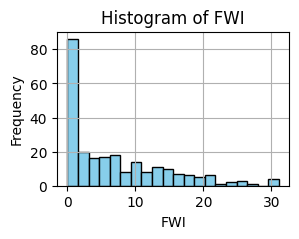

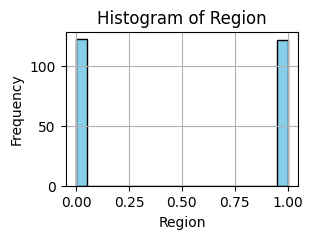

In [123]:
# Plotting histogram for df columns
for column in df.select_dtypes(include=['number']).columns:
  plt.figure(figsize=(3,2))
  plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
  plt.title('Histogram of {}'.format(column))
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.grid(True)
  plt.show()

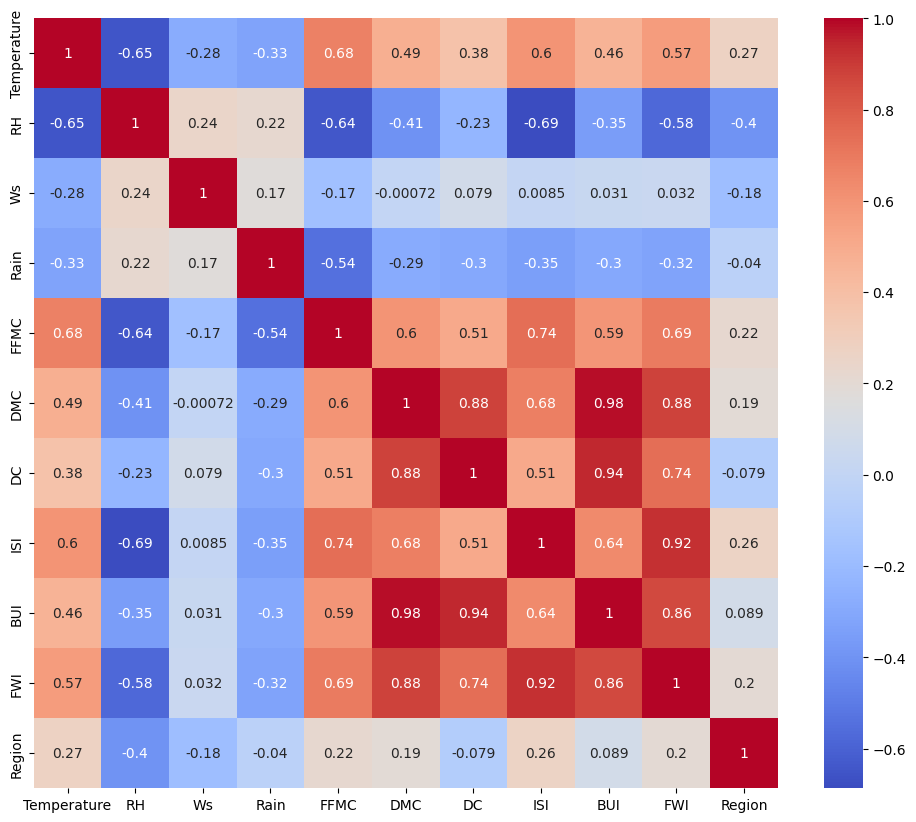

In [124]:
# plotting the correlation between all features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(),cmap = "coolwarm", annot= True)
plt.show()

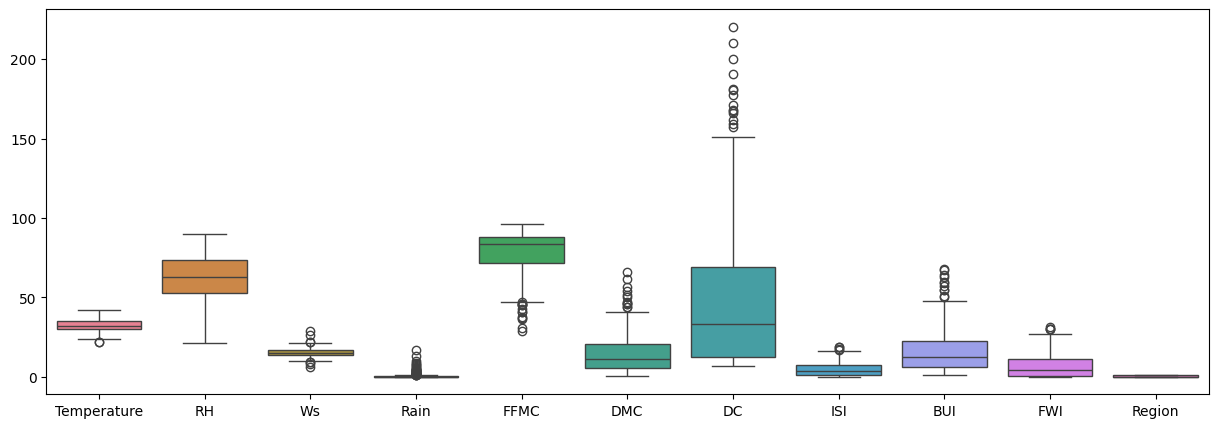

In [125]:
# Plotting boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(data=df)
plt.show()

In [126]:
# creating a function for replacing outliers values with median
def replace_outliers(column):
  column_copy = column.copy()
  Q1 = column_copy.quantile(0.25)
  Q3 = column_copy.quantile(0.75)
  IQR = Q3 - Q1
  lower_bound =  Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = (column_copy < lower_bound) | (column_copy > upper_bound)
  column_copy[outliers] = column_copy.median()
  return column_copy
"""
for column in df.select_dtypes(include=['number']).columns:
    df[column] = replace_outliers(df[column])
"""

"\nfor column in df.select_dtypes(include=['number']).columns:\n    df[column] = replace_outliers(df[column])\n"

In [127]:
"""
for column in df.select_dtypes(include=['number']).columns:
  outliers = detect_outliers(df[column])
  print("Outliers in column '{}':".format(column))
  print(outliers)
"""

'\nfor column in df.select_dtypes(include=[\'number\']).columns:\n  outliers = detect_outliers(df[column])\n  print("Outliers in column \'{}\':".format(column))\n  print(outliers)\n'

In [128]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [129]:
# Keeping aside 5 records for later evaluation
unseen_records = df.sample(5, random_state=42)

# Removing the unseen records from the dataset
df = df.drop(unseen_records.index)

# Taking the 3 features for our prediction in X dataframe and our dependent variable
X = df[['Temperature', 'RH', 'Ws']]
y = df['FWI']

In [130]:
# data splitting 80 - 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [131]:
# Standarization of data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [132]:
print("Shape of X_train:", X_train_sc.shape)
print("Shape of X_test:", X_test_sc.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (190, 3)
Shape of X_test: (48, 3)
Shape of y_train: (190,)
Shape of y_test: (48,)


In [133]:
# creating linear regression model
lr = LinearRegression()
lr.fit (X_train_sc, y_train)

LinearRegression()

In [134]:
lr.coef_, lr.intercept_

(array([ 2.71598318, -3.22199657,  1.68119103]), 7.019999999999999)

In [135]:
y_test_pred = lr.predict(X_test_sc)

In [136]:
print("Metrics for Linear Regression model: ")
MAE = mean_absolute_error(y_test,y_test_pred)
MSE = mean_squared_error(y_test, y_test_pred)
R2 = r2_score(y_test, y_test_pred)
print('MAE: ', MAE)
print('MSE: ',MSE)
print('R2: ', R2)

Metrics for Linear Regression model: 
MAE:  4.8781102337778535
MSE:  38.70765194134835
R2:  0.3224930870586592


In [137]:
# Defining the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create Ridge regression model
ridge_model = Ridge()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)  # Use scaled features

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha for training: ", best_alpha)

Best Alpha for training:  1


In [138]:
# Fit the Ridge model with the best hyperparameters to the scaled training data
Ridge_tunned = Ridge(alpha=best_alpha)
Ridge_tunned.fit(X_train_sc, y_train)

# Predicting using the tunned model
Ridge_pred = Ridge_tunned.predict(X_test_sc)

print("Metric for Tunned Ridge: ")
MAE = mean_absolute_error(y_test,Ridge_pred)
MSE = mean_squared_error(y_test, Ridge_pred)
R2 = r2_score(y_test, Ridge_pred)
print('MAE: ', MAE)
print('MSE: ',MSE)
print('R2: ', R2)

Metric for Tunned Ridge: 
MAE:  4.875806519842013
MSE:  38.68842665277905
R2:  0.3228295907021437


In [139]:
# Defining the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create Lasso regression model
Lasso_model = Lasso()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(Lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)  # Use scaled features

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha for training: ", best_alpha)

Best Alpha for training:  0.001


In [140]:
# Fit the Lasso model with the best hyperparameters to the scaled training data
Lasso_tunned = Lasso(alpha=best_alpha)
Lasso_tunned.fit(X_train_sc, y_train)

# Predicting using the tunned model
Lasso_pred = Lasso_tunned.predict(X_test_sc)

print("Metric for Tunned Lasso: ")
MAE = mean_absolute_error(y_test,Lasso_pred)
MSE = mean_squared_error(y_test, Lasso_pred)
R2 = r2_score(y_test, Lasso_pred)
print('MAE: ', MAE)
print('MSE: ',MSE)
print('R2: ', R2)

Metric for Tunned Lasso: 
MAE:  4.8780114703177855
MSE:  38.70672242851363
R2:  0.3225093564870437


In [141]:
# Defining the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create ElasticNet regression model
Elastic_model = ElasticNet()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(Elastic_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc, y_train)  # Use scaled features

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha for training: ", best_alpha)

Best Alpha for training:  0.01


In [142]:
# Fit the Elastic model with the best hyperparameters to the scaled training data
Elastic_tunned = ElasticNet(alpha=best_alpha)
Elastic_tunned.fit(X_train_sc, y_train)

# Predicting using the tunned model
Elastic_pred = Elastic_tunned.predict(X_test_sc)

print("Metric for Tunned ElasticNet: ")
MAE = mean_absolute_error(y_test,Elastic_pred)
MSE = mean_squared_error(y_test, Elastic_pred)
R2 = r2_score(y_test, Elastic_pred)
print('MAE: ', MAE)
print('MSE: ',MSE)
print('R2: ', R2)

Metric for Tunned ElasticNet: 
MAE:  4.875444320578254
MSE:  38.68547225442336
R2:  0.32288130206176313


The three models demonstrate a moderate level of predictive ability, explaining around 32% of the variance in fire intensity.
The Tuned ElasticNet Regression model shows a slight improvement over other linear regression models, indicating that the regularization parameter (alpha) used in Elastic regression contributes to a slightly better fit.

In attempt to have a higher accuracy for prediction, we are going to look into adding more high correlated features that would help in increasing the prediction accuracy

In [158]:
# Select features with high impact on FWI
selected_features = ['BUI', 'ISI', 'DC', 'DMC', 'FFMC', 'Rain', 'RH', 'Temperature']

# Update variables with the new feature set
X_new = df[selected_features]
y_new = df['FWI']

# Split the data into a training set and a test set
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, y_new, test_size=0.20, random_state=42)

In [159]:
# Standardize the data
scaler_new = StandardScaler()
feature_names = X_train_new.columns.tolist()
X_train_sc_new = scaler_new.fit_transform(X_train_new)
X_test_sc_new = scaler_new.transform(X_test_new)
print('Feature names: ', feature_names)

Feature names:  ['BUI', 'ISI', 'DC', 'DMC', 'FFMC', 'Rain', 'RH', 'Temperature']


In [160]:
# Defining the hyperparameter grid
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create ElasticNet regression model
Elastic_model = ElasticNet()

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(Elastic_model, param_grid, cv=50, scoring='neg_mean_squared_error')
grid_search.fit(X_train_sc_new, y_train_new)  # Use scaled features

# Get the best hyperparameters
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha for training: ", best_alpha)

Best Alpha for training:  0.001


In [161]:
# Fit the Elastic model with the best hyperparameters to the scaled training data
Elastic_new = ElasticNet(alpha=best_alpha)
Elastic_new.fit(X_train_sc_new, y_train_new)

# Predicting using the tunned model
Elastic_pred = Elastic_new.predict(X_test_sc_new)

In [162]:
print("Metric for Tunned ElasticNet: ")
MAE = mean_absolute_error(y_test_new,Elastic_pred)
MSE = mean_squared_error(y_test_new, Elastic_pred)
R2 = r2_score(y_test_new, Elastic_pred)
print('MAE: ', MAE)
print('MSE: ',MSE)
print('R2: ', R2)

Metric for Tunned ElasticNet: 
MAE:  0.7811130665812586
MSE:  5.305775853577327
R2:  0.907132062033555


In [163]:
# Saving the tunned elastic model as pickle file
import pickle
pickle.dump(Elastic_new, open('ENR.pkl','wb'))
pickle.dump(scaler_new, open('scaler.pkl', 'wb'))

In [164]:
def preprocess_data(df):

  # List of columns to keep
  columns_to_keep = ['BUI', 'ISI', 'DC', 'DMC', 'FFMC', 'Rain', 'RH', 'Temperature', 'FWI']

  # Drop all columns except the specified columns
  df = df[df.columns.intersection(columns_to_keep)]

  # Separate independent and dependent variables
  X = df.drop(columns=['FWI'])  # Independent variables
  y = df['FWI']  # Dependent variable

  with open('scaler.pkl', 'rb') as file:
      scaler = pickle.load(file)

  X_scaled = scaler.transform(X)

  #X_scaled = pd.DataFrame(X_scaled, columns=['Temperature', 'RH', 'Ws'])
  #y = pd.DataFrame(y, columns=['FWI'])

  return X_scaled, y

In [165]:
# Load the pickled model
pickle_file_path = '/content/ENR.pkl'
with open(pickle_file_path, 'rb') as file:
    loaded_model = pickle.load(file)

**Purpose of Pickling and benifits**

1. **Storage**: Pickling is like putting your trained model and data scaler in a sealed container for later use.

2. **Consistency**: It ensures that when you use your model later, it applies the same data transformations it learned during training.

3. **Efficiency**: Saves time and resources by not requiring retraining every time you want to use the model.

4. **Portability**: Easy to move and share your model, making it handy for deployment.
Version Control: Helps keep track of different versions of your model.

5. **Integration**: Compatible with various systems for easy use in applications.

In [156]:
unseen_records.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
24,31,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4,0
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0
152,28,58,18,2.2,63.7,3.2,8.5,1.2,3.3,0.5,1
232,34,58,13,0.2,79.5,18.7,88.0,2.1,24.4,3.8,1
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1


In [169]:
desired_order = ['BUI', 'ISI', 'DC', 'DMC', 'FFMC', 'Rain', 'RH', 'Temperature', 'FWI']
unseen_records_ordered = unseen_records.reindex(columns=desired_order)

In [170]:
unseen_records_ordered.head()

,BUI,ISI,DC,DMC,FFMC,Rain,RH,Temperature,FWI
24,18.3,5.7,63.8,14.2,86.7,0.0,64,31,8.4
6,10.9,6.4,30.5,9.9,88.2,0.0,54,33,7.2
152,3.3,1.2,8.5,3.2,63.7,2.2,58,28,0.5
232,24.4,2.1,88.0,18.7,79.5,0.2,58,34,3.8
238,16.9,4.5,44.5,16.0,85.4,0.0,65,30,6.5


In [171]:
X_scaled, y = preprocess_data(unseen_records_ordered)

In [172]:
# Display the first few rows of the scaled independent variables
print("Scaled independent variables:")
print(X_scaled[:5])  # Display the first 5 rows

Scaled independent variables:
[[ 0.13648625  0.23734137  0.32289768 -0.02235556  0.62245943 -0.39018591
   0.12738518 -0.2992524 ]
 [-0.40883818  0.40614566 -0.3892624  -0.39133525  0.72469013 -0.39018591
  -0.54306313  0.23714341]
 [-0.96890111 -0.84782907 -0.85975854 -0.9662571  -0.945078    0.6440418
  -0.27488381 -1.10384613]
 [ 0.58601044 -0.63079498  0.84044343  0.36378598  0.13175206 -0.29616521
  -0.27488381  0.50534132]
 [ 0.03331676 -0.05203741 -0.08985576  0.13210105  0.53385949 -0.39018591
   0.19443001 -0.56745031]]


In [173]:
y.head()

24     8.4
6      7.2
152    0.5
232    3.8
238    6.5
Name: FWI, dtype: float64

In [174]:
prediction = loaded_model.predict(X_scaled)

In [175]:
print(prediction)

[8.18858959 7.34890989 0.0645206  5.0705096  6.36475385]


In [176]:
print("Model evaluation metrics for pickled model: ")
MSE = mean_squared_error(y, prediction)
MAE = mean_absolute_error(y, prediction)
R2 = r2_score(y, prediction)
print('MAE: ', MAE)
print('MSE: ',MSE)
print('R2: ', R2)

Model evaluation metrics for pickled model: 
MAE:  0.44031109182610206
MSE:  0.377799400238572
R2:  0.9527136026536283


In conclusion, our analysis demonstrated the effectiveness of the elastic net regression model in predicting outcomes. Initially, with three independent variables, all regression models performed moderately (32%), with elastic net slightly outperforming the others with small margin in accuracy. However, upon incorporating five additional correlated features, the elastic net model achieved a 90% accuracy.

The elastic net model's ability to handle multicollinearity and provide robust predictions is a strength. Nevertheless, model performance is contingent upon feature quality and dataset size, and potential overfitting should be considered.

To enhance the model further, we recommend continued feature engineering and regularization technique exploration. Evaluating performance on larger datasets would also provide valuable insights into model generalizability.